<a href="https://colab.research.google.com/github/PaoloMadda01/Projects-with-Google-Colab/blob/main/Progetto_scaffale.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

(GITHUB)

*** Caricamento dell'immagine di test ***

In [ ]:
import numpy as np
import tensorflow as tf
import cv2
import json
from google.colab import files

# Carica l'immagine dal tuo computer
uploaded = files.upload()
image_path = list(uploaded.keys())[0]

Saving test7.jpeg to test7.jpeg


*** Caricamento del modello ***

In [ ]:
uploaded = files.upload()

Saving keras_model.h5 to keras_model.h5


In [ ]:
import numpy as np
import tensorflow as tf
import cv2
import json

model = tf.keras.models.load_model('keras_model.h5')


# Pre-processa l'immagine
def preprocess_image(image_path):
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (224, 224))  # Ridimensiona l'immagine alla dimensione di input richiesta dal tuo modello (potrebbe variare)
    img = img / 255.0  # Normalizza i valori dei pixel tra 0 e 1
    return np.expand_dims(img, axis=0)

# Predici usando il modello
def predict(image_path, model):
    image = preprocess_image(image_path)
    predictions = model.predict(image)
    return predictions



# Usa la funzione di previsione sull'immagine
predictions = predict(image_path, model)

# Stampa le previsioni
print(predictions)  # Questo ti darà la probabilità per ciascuna classe.


for valore in predictions:
    if valore[0] > valore[1]:
        print("Il scaffale è vuoto")
    else:
        print("Il scaffale è pieno")

1/1 [==============================] - 1s 1s/step
[[9.999248e-01 7.516100e-05]]
Il scaffale è vuoto


1/1 [==============================] - 1s 929ms/step
[[0.00256669 0.99743336]]
1/1 [==============================] - 0s 38ms/step
[[0.00651295 0.993487  ]]
1/1 [==============================] - 0s 36ms/step
[[0.00214938 0.99785066]]
1/1 [==============================] - 0s 37ms/step
[[0.00829485 0.9917052 ]]
1/1 [==============================] - 0s 35ms/step
[[0.00182897 0.998171  ]]
1/1 [==============================] - 0s 34ms/step
[[0.00726016 0.99273986]]
1/1 [==============================] - 0s 34ms/step
[[0.01113198 0.988868  ]]
1/1 [==============================] - 0s 35ms/step
[[0.01118621 0.9888138 ]]
1/1 [==============================] - 0s 38ms/step
[[0.02093732 0.9790627 ]]
1/1 [==============================] - 0s 36ms/step
[[0.01077678 0.98922324]]
1/1 [==============================] - 0s 34ms/step
[[0.01232148 0.98767847]]
1/1 [==============================] - 0s 34ms/step
[[0.00150698 0.99849296]]
1/1 [==============================] - 0s 45ms/step
[[0.0028996

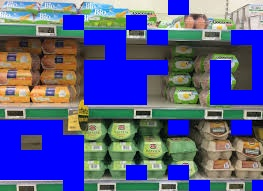

In [ ]:
import numpy as np
import tensorflow as tf
import cv2
import json
from PIL import Image
from google.colab.patches import cv2_imshow

model = tf.keras.models.load_model('keras_model.h5')


# Pre-processa l'immagine
def preprocess_image(image_path):
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (224, 224))  # Ridimensiona l'immagine alla dimensione di input richiesta dal tuo modello (potrebbe variare)
    img = img / 255.0  # Normalizza i valori dei pixel tra 0 e 1
    return np.expand_dims(img, axis=0)


# Predici usando il modello
def predict(image_path, model):
    image = preprocess_image(image_path)
    predictions = model.predict(image)
    return predictions

def predict_regions_and_color(image_path, model, grid_size=(12, 12), threshold_factor=70):
    image = cv2.imread(image_path)
    height, width, _ = image.shape
    region_width = width // grid_size[1]
    region_height = height // grid_size[0]

    for y in range(0, height, region_height):
        for x in range(0, width, region_width):
            region = image[y:y+region_height, x:x+region_width].copy()
            cv2.imwrite("temp_region.jpg", region)
            prediction = predict("temp_region.jpg", model)
            print(prediction)

            # Colora la regione in blu solo se la classe 1 è almeno threshold_factor volte maggiore della classe 2
            if prediction[0][0] * threshold_factor > prediction[0][1]:

                image[y:y+region_height, x:x+region_width] = [255, 0, 0]

    cv2.imwrite("result_image.jpg", image)  # Salva l'immagine risultante
    return "result_image.jpg"


# Ora chiama la funzione
result = predict_regions_and_color(image_path, model)

img = cv2.imread(result)
cv2_imshow(img)

In [ ]:
!pip install roboflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 155.3/155.3 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 15.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 17.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.2/72.2 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 7.0 MB/s eta 0:00:00
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 3.1.1
    Uninstalling pyparsing-3.1.1:
      Successfully uninstalled pyparsing-3.1.1
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.8.1.78
    Uninstalling opencv-python-headless-4.8.1.78:
      Successfully uninstall

loading Roboflow workspace...
loading Roboflow project...
{'predictions': [{'x': 107.0, 'y': 90.5, 'width': 70.0, 'height': 77.0, 'confidence': 0.751345157623291, 'class': 'Vacio', 'class_id': 0, 'image_path': 'temp_image.jpg', 'prediction_type': 'ObjectDetectionModel'}, {'x': 29.5, 'y': 176.0, 'width': 59.0, 'height': 76.0, 'confidence': 0.749923825263977, 'class': 'Vacio', 'class_id': 0, 'image_path': 'temp_image.jpg', 'prediction_type': 'ObjectDetectionModel'}, {'x': 213.0, 'y': 91.0, 'width': 22.0, 'height': 72.0, 'confidence': 0.5291512608528137, 'class': 'Vacio', 'class_id': 0, 'image_path': 'temp_image.jpg', 'prediction_type': 'ObjectDetectionModel'}], 'image': {'width': '224', 'height': '224'}}


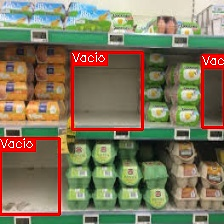

In [ ]:
from roboflow import Roboflow

img = cv2.imread(image_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.resize(img, (224, 224))  # Ridimensiona l'immagine alla dimensione di input richiesta dal tuo modello (potrebbe variare)
img = img / 255.0  # Normalizza i valori dei pixel tra 0 e 1


rf = Roboflow(api_key="mNU8ZjZj2mEuo0QZeTS4")
project = rf.workspace().project("inventario-v2-390")
model = project.version(4).model

# infer on a local image
cv2.imwrite('temp_image.jpg', img * 255)  # De-normalize the image values to 0-255 and save to disk
print(model.predict('temp_image.jpg', confidence=40, overlap=30).json())  # Use the file path instead of the image array

model.predict('temp_image.jpg', confidence=40, overlap=30).save("prediction.jpg")


img = cv2.imread('prediction.jpg')
# Converte l'immagine in RGB (dal momento che OpenCV carica le immagini in BGR)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
cv2_imshow(img_rgb)
